In [1]:
import csv

In [6]:
import pandas as pd
whatsapp = pd.read_csv('C:/Users/JUEFE/Desktop/Fe/Jupyter/GRUPOBI23_chat.csv', sep="]",encoding='UTF-8')

In [2]:
whatsapp

,[22/03/2021 19:58:14,â€Žâ€ª+55Â 11Â 97301â€‘7387â€¬ a crÃ©Ã© le groupe â€œIMPACTA - B.I 23â€
0,[22/03/2021 19:58:14,â€Ž+55 11 97301-7387 vous a ajoutÃ©(e)
1,[22/03/2021 20:00:21,â€Žâ€ª+55Â 11Â 97301â€‘7387â€¬ a changÃ© l'ic...
2,[22/03/2021 20:02:01,"â€ª+55Â 11Â 94498â€‘5010â€¬: Obrigado, Mirella!"
3,[22/03/2021 20:02:13,"â€ª+55Â 11Â 94498â€‘5010â€¬: Boa noite, pessoal!"
4,[22/03/2021 20:03:57,â€ª+55Â 11Â 94498â€‘5010â€¬: Pra deixar salvo...
...,...,...
5752,[30/05/2021 13:01:36,â€ª+55Â 11Â 95765â€‘5550â€¬: pode ser isso en...
5753,â€Ž[30/05/2021 13:02:03,â€ª+55Â 11Â 95765â€‘5550â€¬: â€Žimage absente
5754,[30/05/2021 13:02:18,â€ª+55Â 11Â 95044â€‘8969â€¬: Acho que nao cri...
5755,[30/05/2021 13:05:34,"â€ª+55Â 11Â 95765â€‘5550â€¬: ah nÃ£o, parece ..."


In [21]:
#bibliotca para formatar data.
import datetime

#
from collections import Counter

#
import collections

#
import pandas as pd

#
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
ref_arquivo = open('GRUPOBI23_chat.txt', "r", encoding='utf-8')
linha = ref_arquivo.readline()

list_datas = []
list_erros_formatacao = []
list_pessoas = []
list_msgs = []

while linha:
    linha = ref_arquivo.readline()
    
    try:
        date_time_obj = datetime.datetime.strptime(linha[1:20], '%d/%m/%Y %H:%M:%S')
        list_datas.append(date_time_obj)
        msg = linha[21:]
        if(len(msg.split(':')) >= 2):
            list_pessoas.append(msg.split(':')[0])
            list_msgs.append(msg.split(':')[1])
    except ValueError:
        list_erros_formatacao.append('Errors de formatação de data')
ref_arquivo.close()

<AxesSubplot:title={'center':'Pessoas e suas frequencias'}, xlabel='Pessoa'>

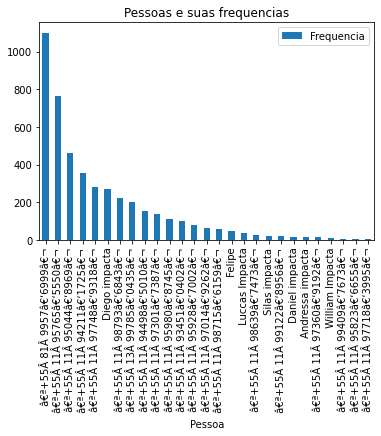

In [13]:
dict_pessoas = dict(Counter(list_pessoas))
pessoas_df = pd.DataFrame(dict_pessoas.items(), columns=['Pessoa', 'Frequencia'])
pessoas_df = pessoas_df.sort_values(by=['Frequencia'], ascending=False)
pessoas_df.plot(kind='bar', x = 'Pessoa', y='Frequencia', title='Pessoas e suas frequencias')

In [23]:
pessoas_df['Pessoa']

4       â€ª+55Â 81Â 9957â€‘6999â€¬
6      â€ª+55Â 11Â 95765â€‘5550â€¬
17     â€ª+55Â 11Â 95044â€‘8969â€¬
1      â€ª+55Â 11Â 94211â€‘1725â€¬
7      â€ª+55Â 11Â 97748â€‘9318â€¬
9                    Diego impacta
8      â€ª+55Â 11Â 98793â€‘6843â€¬
12     â€ª+55Â 13Â 99785â€‘0435â€¬
0      â€ª+55Â 11Â 94498â€‘5010â€¬
3      â€ª+55Â 11Â 97301â€‘7387â€¬
2      â€ª+55Â 11Â 95980â€‘8745â€¬
5      â€ª+55Â 11Â 93451â€‘0402â€¬
15     â€ª+55Â 11Â 95928â€‘7002â€¬
20     â€ª+55Â 11Â 97014â€‘9262â€¬
13     â€ª+55Â 11Â 98715â€‘6159â€¬
11                          Felipe
22                  Luccas Impacta
21     â€ª+55Â 11Â 98639â€‘7473â€¬
10                   Silas impacta
16     â€ª+55Â 11Â 99122â€‘8956â€¬
24                  Daniel impacta
14                Andressa impacta
26     â€ª+55Â 11Â 97360â€‘9192â€¬
18                 William Impacta
23     â€ª+55Â 11Â 99409â€‘7673â€¬
19     â€ª+55Â 11Â 95823â€‘6655â€¬
25     â€ª+55Â 11Â 97718â€‘3995â€¬
Name: Pessoa, dtype: object

<AxesSubplot:title={'center':'Palavras mais faladas'}, xlabel='Palavra'>

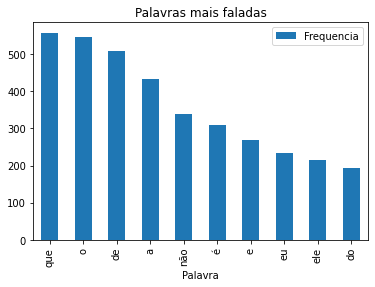

In [27]:
def contador_palavras(msgs):
    palavras = []
    for frases in msgs:
        for palavra in frases.split():
            palavras.append(palavra)
    return Counter(palavras)

palavras_dict = dict(contador_palavras(list_msgs))

palavras_df = pd.DataFrame(palavras_dict.items(), columns=['Palavra', 'Frequencia'])
palavras_df = palavras_df.sort_values(by=['Frequencia'], ascending=False)
palavras_df.head(10).plot(kind='bar', x = 'Palavra', y='Frequencia', title='Palavras mais faladas')

In [28]:
dia_da_semana = {
  0: "Domingo",
  1: "Segunda",
  2: "Terça"
}
list_horas = []
list_dia_semana = []
for data in list_datas:
    list_horas.append(data.time().hour)
    
    list_dia_semana.append(dia_da_semana.get(data.weekday()))
    
    if(data.weekday() == 1):
        list_dia_semana.append('segunda')
    elif(data.weekday() == 2):
        list_dia_semana.append('terca')
    elif(data.weekday() == 3):
        list_dia_semana.append('quarta')
    elif(data.weekday() == 4):
        list_dia_semana.append('quinta')
    elif(data.weekday() == 5):
        list_dia_semana.append('sexta')
    elif(data.weekday() == 6):
        list_dia_semana.append('sabado')
    elif(data.weekday() == 0):
        list_dia_semana.append('domingo')

In [31]:
dict_dia_semana = dict(Counter(list_dia_semana))

<AxesSubplot:title={'center':'Dia da Semana que tem conversa'}, xlabel='Dia_Semana'>

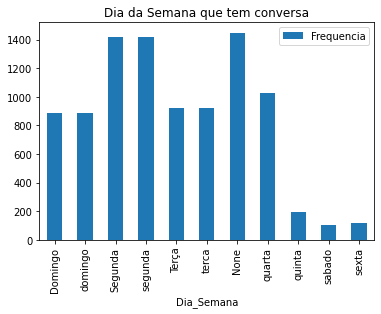

In [32]:
semana_df = pd.DataFrame(dict_dia_semana.items(), columns=['Dia_Semana', 'Frequencia'])
semana_df.plot(kind='bar', x = 'Dia_Semana', y='Frequencia', title='Dia da Semana que tem conversa')

<AxesSubplot:title={'center':'Horario das Conversas'}, xlabel='Hora'>

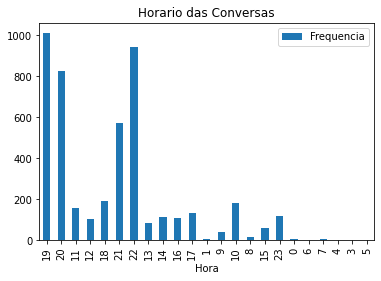

In [33]:
dict_horas = dict(Counter(list_horas))
horas_df = pd.DataFrame(dict_horas.items(), columns=['Hora', 'Frequencia'])
horas_df.plot(kind='bar', x = 'Hora', y='Frequencia', title='Horario das Conversas')

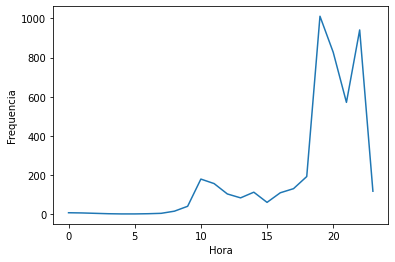

In [34]:
ax = sns.lineplot(x="Hora", y="Frequencia", data=horas_df, ci=68)